[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vmetsis/cads-cv/blob/main/2.5-edge_detection.ipynb)

# Edge Detection

## Download the Data

In [1]:
# If running on Google Colab, download the data first.

import os
import sys

def download_files(base_url, files, local_dir):
    if not os.path.exists(local_dir):
        os.makedirs(local_dir)
    for file in files:
        file_url = base_url + file
        os.system(f"wget -q {file_url} -P {local_dir}")

def download_data():
    base_url = "https://raw.githubusercontent.com/vmetsis/cads-cv/main/data/"
    data_files = ["church.jpg"]
    
    download_files(base_url, data_files, 'data')

if 'google.colab' in sys.modules:
    download_data()

## Canny Edge Detector


Edge detection is a popular image processing technique that is used to detect the edges of an image. The edges are defined as the points where the intensity changes abruptly. One way to detect the edges is to use the Sobel filter. However, as we saw in the prevous example, the gradient values returned by the sobel filter, after calculating the gradient in all directions, can be any real number. To decide if a pixel is an edge or not, we need to use a threshold and convert the gradient to a binary value. Depending on the threshold value, the strength of the gradient and the noise levels in the image, the white pixels that we get from this process can be either edges or not edges. 

The **Canny Edge Detector** is an algorithm that tries to solve those problems by following a few simple steps:
- **Step 1**: Blur the image to reduce noise by applying a Gaussian filter.
- **Step 2**: Calculate the gradient in all directions using the Sobel filter.
- **Step 3**: Calculate the magnitude of the gradient at each pixel.
- **Step 4**: Calculate the direction of the gradient at each pixel.
- **Step 5**: Apply a non-maximum suppression to remove spurious edges.
- **Step 6**: Apply a hysteresis threshold to identify the edges.

Let's apply the Canny edge detection to the church image from the example above. The Canny edge detection is implemented as the function `cv.Canny`. 

The parameters of the Canny edge detection are:
- img: The image to be filtered.
- threshold1: The first threshold for the hysteresis procedure.
- threshold2: The second threshold for the hysteresis procedure.
- apertureSize: The aperture (filter) size for the Sobel operator. Commonly apertureSize=3.
- L2gradient: A flag that indicates whether we want to use a L2-norm (true) or L1-norm (false) for the gradient.
- **Returns**: The edges of the image.
- **See also**: [Canny edge detection](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de)


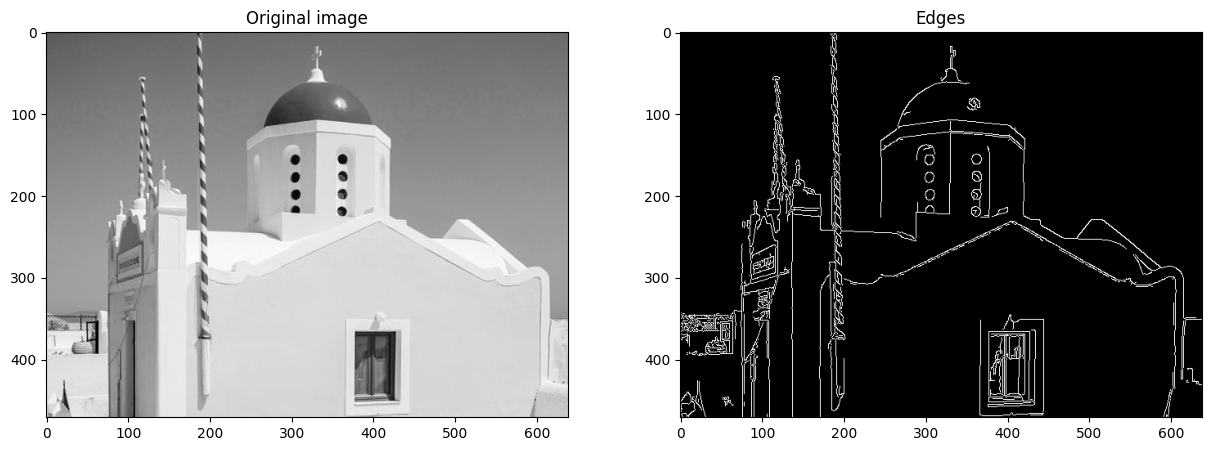

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

img = cv.imread('data/church.jpg', cv.IMREAD_GRAYSCALE)

edges = cv.Canny(img, threshold1=30, threshold2=200, apertureSize=3, L2gradient=True)    # Canny edge detection

# Show original image and edges
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray'), plt.title('Original image')
plt.subplot(122)
plt.imshow(edges, cmap='gray'), plt.title('Edges')
plt.show()


### Discussion on the Canny edge detection
Let's now discuss each one of the parameters of the Canny edge detection in more detail.

#### 1. Blur the image
Bluring the image helps reduce noise and spurious edges. That way we can generate a more "clean" edge image.


#### 2. Calculate the gradient in all directions using the Sobel filter
Applying the Sobel filter in all directions helps to calculate the gradient in all directions. The magnitue and the direction of the gradient at each pixel are calculated and used in the next steps.


#### 3. Calculate the magnitude of the gradient at each pixel
The magnitude of the gradient at each pixel is calculated using the L1 or L2-norm. If $ I_x = dI/dx $ and $ I_y = dI/dy $, then the magnitude of the gradient at each pixel is calculated as:

The L1-norm is the sum of the absolute values of the gradient at each pixel: $ Grad_{L_1} =|I_x|+|I_y| $.

The L2-norm is the square root of the sum of the squares of the gradient at each pixel. $ Grad_{L_2} =\sqrt{I_x^2+I_y^2} $.

Where $ dI/dx $ is the derivative of the intensity with respect to the x-axis and $ dI/dy $ is the derivative of the intensity with respect to the y-axis, as calculated by the Sobel filter.


#### 4. Calculate the direction of the gradient at each pixel
The direction of the gradient is the direction of the fastest change in intensity, and it is a unit vector perpendicular to the edge. The direction of the gradient at each pixel is calculated as the slope $ \theta $ of the gradient vector, using the arctangent of the gradient vector. The arctangent is the angle between the x-axis and the gradient. The angle is measured in radians but it can also be converted to degrees.
$$ \theta = \arctan(I_y/I_x) $$


#### 5. Apply a non-maximum suppression to remove spurious edges
The non-maximum suppression is a technique for making edges one pixel thick. The principle is simple: the algorithm goes through all the points on the gradient intensity matrix and finds the pixels with the maximum value in the edge directions. If the pixel is not in the edge direction, then it is set to 0. If a pixel is in the edge direction but it is not the maximum value, i.e. the strongest pixel in the edge direction, then it is set to 0. If the pixel is in the edge direction and it is the maximum value, then we keep it.


#### 6. Apply a hysteresis threshold to identify the edges
The hysteresis threshold is a technique for deciding if a pixel is an edge pixel or not when binarizing the edge image. The algorithm goes through all the pixels in the image and if the pixel is below the low threshold, then it is set to 0. If the pixel is above the high threshold, then it is set to 1. If the pixel is between the low and high thresholds, then it is set to 1 only if it is connected to a pixel that is above the high threshold. The effect of this process is that it creates more continuous edges.

One question that remains is how to decide the low and high thresholds. The simple way is to try different values and see which one works best visually. A more automated way is to use Otsu's method to determine the high threshold on the non-maximum suppressed gradient magnitude image to generate the high threshold. The low threshold is typically set to 1/2 of the high threshold in this case. Since the gradient magnitude image is continuous-valued without a well-defined maximum, Otsu's method has to be adapted to use value/count pairs instead of a complete histogram. 

## Appendix

### Bilinear Interpolation

The term "bilinear" in "bilinear interpolation" refers to the use of linear interpolation in two dimensions. The term can be broken down into "bi-" meaning two, and "linear," which indicates the type of interpolation. Here's a quick rundown of how it works:

1. **Horizontal Interpolation**: For each of the two "lines" of pixel values that are closest to the target point in the vertical direction, a linear interpolation is performed in the horizontal direction. Essentially, you're finding an approximate value along each of the two horizontal lines nearest to the point.
   
2. **Vertical Interpolation**: Then, using the results of the two horizontal interpolations, another linear interpolation is performed in the vertical direction to find the approximate value at the target point.

So you perform one linear interpolation for the rows ("top" and "bottom" rows) and another linear interpolation for the columns ("left" and "right" columns), hence "bilinear."

Mathematically, if $ f(x, y) $ is the function representing the image, and you want to interpolate the value at a point $(x, y)$ using the four surrounding points $(x_0, y_0), (x_1, y_0), (x_0, y_1), (x_1, y_1)$, the bilinear interpolation formula would look something like this:

$
f(x, y) = (1 - x) \times (1 - y) \times f(x_0, y_0) + x \times (1 - y) \times f(x_1, y_0) + x \times y \times f(x_1, y_1) + (1 - x) \times y \times f(x_0, y_1)
$

Each term is a linear interpolation in one dimension, and the entire formula is a combination of these linear interpolations in two dimensions.

In [3]:
import numpy as np

def bilinear_interpolation(image, x, y):
    rows, cols = image.shape
    x1, y1 = np.floor(x).astype(int), np.floor(y).astype(int)
    x2, y2 = np.ceil(x).astype(int), np.ceil(y).astype(int)
    
    # Clip the indices to lie within the valid range to avoid out-of-bounds errors
    x1 = np.clip(x1, 0, rows-1)
    y1 = np.clip(y1, 0, cols-1)
    x2 = np.clip(x2, 0, rows-1)
    y2 = np.clip(y2, 0, cols-1)
    
    q11 = image[x1, y1]
    q21 = image[x2, y1]
    q12 = image[x1, y2]
    q22 = image[x2, y2]
    
    return q11 * (x2 - x) * (y2 - y) + q21 * (x - x1) * (y2 - y) + q12 * (x2 - x) * (y - y1) + q22 * (x - x1) * (y - y1)

# Example usage
image = np.array([[1, 2],
                  [3, 4]], dtype=float)

row = 0.5
col = 0.5

result = bilinear_interpolation(image, row, col)
print("Interpolated value:", result)


Interpolated value: 2.5


### Non-Maxima Suppression

Non-Maxima Suppression (NMS) is a crucial step in edge detection algorithms such as the Canny edge detector. Its primary role is to thin the edges, ensuring that they are sharp and well-defined. The algorithm works by preserving the local maxima in the gradient magnitude of the image while setting the other pixels to zero, effectively suppressing non-maximal pixels.

#### Algorithm Steps

1. **Input**: 
    - The gradient magnitude (`grad_norms`) of an image, which quantifies the "edginess" at each pixel.
    - The gradient direction (`thetas`) at each pixel, typically in degrees or radians.
    - The distance (`distance`) parameter, which defines how far to look when comparing the gradient magnitude with its neighbors along the gradient direction.
    
2. **Initialization**: 
    - Initialize an output array, `result`, with the same dimensions as the input image, setting all elements to zero.
    - Convert gradient directions to radians if they are given in degrees.

3. **Padding**: 
    - Pad the gradient magnitude array with zeros to handle boundary cases.
  
4. **Loop Over Pixels**: 
    - For each pixel (ignoring a margin around the edges), do the following:
        - Find the gradient magnitude and direction at the current pixel.
        - Calculate the coordinates of two points along the gradient direction, one in the positive direction (`value1`) and one in the negative direction (`value2`), separated by a distance specified by the `distance` parameter.
        - Use bilinear interpolation to find the gradient magnitudes at these two points.
        - Compare the gradient magnitude of the current pixel with those of the two interpolated points:
            - If the gradient magnitude at the current pixel is greater than or equal to both `value1` and `value2`, it is considered a local maximum. Keep this value in the `result` array.
            - Otherwise, set the value in the `result` array to zero, effectively suppressing the non-maxima.

5. **Output**: 
    - The `result` array, which contains thinned edges, is returned.

#### Mathematical Formulation

For a given pixel at location $ (x, y) $ with gradient magnitude $ M(x, y) $ and gradient direction $ \theta(x, y) $, the algorithm checks the gradient magnitudes at two points along the gradient direction:

$$
\begin{align*}
(x_1, y_1) &= (x + \text{distance} \cdot \sin(\theta), y + \text{distance} \cdot \cos(\theta)) \\
(x_2, y_2) &= (x - \text{distance} \cdot \sin(\theta), y - \text{distance} \cdot \cos(\theta))
\end{align*}
$$

Then, $ M(x, y) $ is kept as-is if $ M(x, y) \geq M(x_1, y_1) $ and $ M(x, y) \geq M(x_2, y_2) $.

#### Why is it Important?

Non-Maxima Suppression helps in reducing the thickness of the edges to a single-pixel width, making the edges more accurate and easier to analyze. This makes the subsequent steps in edge detection more effective, leading to better overall results.

#### Advantages

1. Improves edge localization.
2. Reduces false positives by eliminating pixels that are not part of a true edge.
3. Produces cleaner and sharper edges, aiding in better image segmentation and object recognition.

By understanding how non-maxima suppression works, one can better appreciate its crucial role in edge detection and image processing tasks.


In [4]:
def nonmaxima_suppression(grad_norms, thetas, distance):
    thetas = np.deg2rad(thetas)
    rows, cols = grad_norms.shape
    
    # pad image with zeros, to avoid out-of-bounds indexing
    grad_norms = np.pad(grad_norms, ((0, 1), (0, 1)), 'constant')
    
    result = np.zeros((rows, cols))
    margin = int(np.ceil(distance))
    
    for row in range(margin, rows - margin):
        for col in range(margin, cols - margin):
            angle = thetas[row, col]
            displacement = np.array([np.sin(angle), np.cos(angle)]) * distance
            center_value = grad_norms[row, col]
            value1 = bilinear_interpolation(grad_norms, row + displacement[0], col + displacement[1])
            value2 = bilinear_interpolation(grad_norms, row - displacement[0], col - displacement[1])
            
            if center_value >= value1 and center_value >= value2:
                result[row, col] = center_value
                
    return result

The double nested loop can be slow, but it is possible to vectorize the algorithm using NumPy. The following implementation shows how to vectorize the algorithm using NumPy to speed up the process. The implementation quite involved, so it is not necessary to understand it in detail. The important thing is to understand the algorithm and how it works.

In [5]:
def nonmaxima_suppression_fast(grad_norms, thetas, distance):
    thetas = np.deg2rad(thetas)
    rows, cols = grad_norms.shape
    
    # pad image with zeros, to avoid out-of-bounds indexing
    grad_norms = np.pad(grad_norms, ((0, 1), (0, 1)), 'constant')
    
    result = np.zeros((rows, cols))
    margin = int(np.ceil(distance))
    
    row_indices, col_indices = np.meshgrid(
        np.arange(margin, rows - margin), 
        np.arange(margin, cols - margin),
        indexing='ij'
    )
    
    angles = thetas[row_indices, col_indices]
    displacements = distance * np.stack([np.sin(angles), np.cos(angles)], axis=-1)
    
    center_values = grad_norms[row_indices, col_indices]
    
    value1 = bilinear_interpolation(
        grad_norms, 
        row_indices + displacements[..., 0], 
        col_indices + displacements[..., 1]
    )
    
    value2 = bilinear_interpolation(
        grad_norms, 
        row_indices - displacements[..., 0], 
        col_indices - displacements[..., 1]
    )
    
    mask = (center_values >= value1) & (center_values >= value2)
    result[row_indices[mask], col_indices[mask]] = center_values[mask]
    
    return result

### Hysteresis Thresholding

Hysteresis thresholding is an essential step in edge detection algorithms like the Canny edge detector. The technique aims to address the problem of discontinuities in detected edges. In simpler terms, it helps to keep important edge pixels and remove noisy pixels, thereby forming a complete and meaningful edge.

#### Algorithm Steps

1. **Input**: 
    - The pre-processed image (`im`) where edge intensities are usually indicated by gradients.
    - Two threshold values, $ T1 $ (low threshold) and $ T2 $ (high threshold).

2. **Initialization**: 
    - Ensure that $ T2 $ is the higher threshold and $ T1 $ is the lower threshold. Swap them if necessary.

3. **Initial Thresholding**: 
    - Identify pixels where the intensity is greater than $ T1 $ (low threshold) and mark them as potential edge pixels.
    - Find the coordinates of the pixels where the intensity is greater than $ T2 $ (high threshold).

4. **Connected Components Analysis**: 
    - Identify all connected regions in the image that are formed by pixels marked as potential edges in step 3.
  
5. **Edge Tracking by Hysteresis**: 
    - For each connected region, check if it contains at least one pixel whose intensity is greater than $ T2 $. If it does, all the pixels in that connected region are considered edges. Otherwise, they are suppressed (set to zero).

6. **Output**: 
    - A binary image (`bw`) with the final edges where edge pixels are marked as 1 and non-edge pixels as 0.

#### Mathematical Formulation

Let $ I(x, y) $ be the intensity of a pixel at location $ (x, y) $. The algorithm works as follows:

1. Create an initial binary image $ B $ where
   $$
   B(x, y) = 
   \begin{cases} 
   1 & \text{if } I(x, y) > T1 \\
   0 & \text{otherwise}
   \end{cases}
   $$
   
2. Find connected components $ C_1, C_2, \ldots, C_n $ in $ B $.

3. For each connected component $ C_i $, if it contains at least one pixel $ (x, y) $ such that $ I(x, y) > T2 $, then all pixels in $ C_i $ are set to 1 in the output image. Otherwise, they are set to 0.

#### Why is it Important?

Hysteresis thresholding resolves ambiguities in edge detection. By using two thresholds $ T1 $ and $ T2 $, it ensures that weak edges that are connected to strong edges are not discarded, providing a mechanism for spatial continuity of edge pixels.

#### Advantages

1. **Reduces False Edges**: Helps in reducing the number of false or spurious edges in the image.
2. **Improves Edge Continuity**: Ensures that weak edge pixels that are spatially connected to strong edge pixels are not discarded.
3. **Simple and Effective**: Despite its simplicity, hysteresis thresholding is highly effective in isolating meaningful edges in images.

By understanding the roles of the low and high thresholds ($ T1 $ and $ T2 $) in this updated explanation, one can better appreciate the effectiveness of hysteresis thresholding in edge detection.

In [6]:
def hysthresh(im, T1, T2):
    # Ensure T2 is greater than T1
    if T2 < T1:
        T1, T2 = T2, T1
    
    # Pixels above the lower threshold (T1)
    aboveT1 = (im > T1).astype(np.uint8)
    
    # Coordinates of pixels above the upper threshold (T2)
    aboveT2 = np.argwhere(im > T2)
    
    # Find connected components
    _, labels = cv.connectedComponents(aboveT1, connectivity=8)
    
    # Identify components that include a point above the upper threshold (T2)
    unique_labels = np.unique(labels[aboveT2[:, 0], aboveT2[:, 1]])
    
    # Create the output image
    bw = np.isin(labels, unique_labels).astype(np.uint8)
    
    return bw


## Custom implementation of the Canny edge detection

With all the necessary steps explained, we can now implement the Canny edge detection algorithm from scratch.

In [7]:
# Canny edge detection function
def canny(image, sigma, distance, t1, t2):
    # Step 1: Blur the image
    blurred_image = cv.GaussianBlur(image, (0, 0), sigma)
    
    # Step 2: Calculate the gradient using the Sobel filter
    grad_x = cv.Sobel(blurred_image, cv.CV_64F, 1, 0, ksize=3)
    grad_y = cv.Sobel(blurred_image, cv.CV_64F, 0, 1, ksize=3)
    
    # Step 3: Calculate the magnitude of the gradient (L2-norm used here)
    grad_mag = np.sqrt(grad_x**2 + grad_y**2)
    
    # Step 4: Calculate the direction of the gradient
    grad_orient = np.arctan2(grad_y, grad_x)
    grad_orient = np.rad2deg(grad_orient) % 180  # Convert to degrees and constrain to [0, 180)
    
    # Step 5: Apply non-maxima suppression
    suppressed_grad_mag = nonmaxima_suppression_fast(grad_mag, grad_orient, distance)
    
    # Step 6: Apply hysteresis thresholding
    edges = hysthresh(suppressed_grad_mag, t1, t2)
    
    return edges, grad_mag, grad_orient

Let's test the algorithm on the following image:

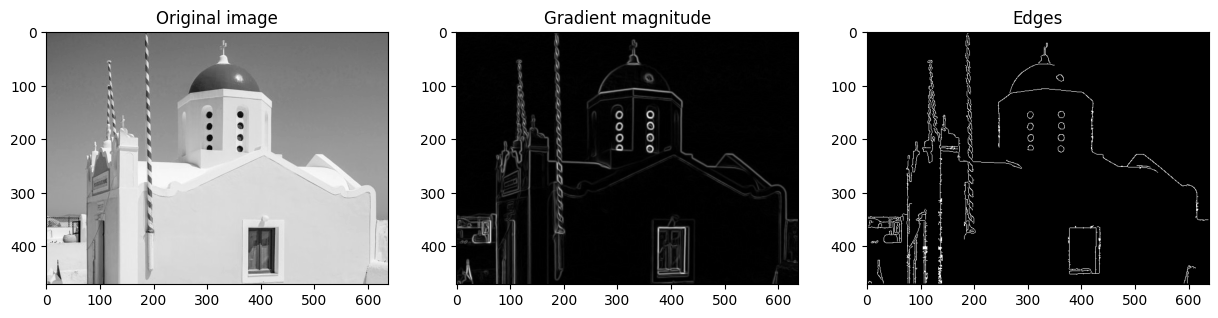

In [8]:
# Apply our canny edge detection function to the church image
img = cv.imread('data/church.jpg', cv.IMREAD_GRAYSCALE)
edges, grad_mag, grad_orient = canny(img, sigma=1, distance=1, t1=30, t2=200)

# Show the results
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap='gray'), plt.title('Original image')
plt.subplot(132)
plt.imshow(grad_mag, cmap='gray'), plt.title('Gradient magnitude')
plt.subplot(133)
plt.imshow(edges, cmap='gray'), plt.title('Edges')
plt.show()
